In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from os import makedirs, listdir
from os.path import join, isfile, isdir, exists, splitext
from pprint import pprint
import json
Settings = json.load(open('settings.txt'))
pprint(Settings)
print("")
from pak.datasets.MOT import MOT16
from pak import utils
import sys
sys.path.append('../')
from pak import utils

from cabbage.features.ReId import StackNet64x64, get_element

root = Settings['data_root']
mot16 = MOT16(root)

stacknet = StackNet64x64(root)

VIDEO = "MOT16-02"
img_loc = mot16.get_test_imgfolder(VIDEO)

X, Y_det, Y_gt = mot16.get_train(VIDEO, memmapped=True)

{'data_root': '/home/data',
 'deepmatch': '/home/deepmatching_1.2.2_c++/deepmatching-static'}



Using TensorFlow backend.


/home/data/MOT16 found :)
Could not find /home/data/reid_models/stacknet64x64_cheat.h5.. attempt download
Download complete.. model: /home/data/reid_models/stacknet64x64_cheat.h5
MOT16: load memmapped file /home/data/MOT16/train/MOT16-02/data.memmap
MOT16 X loaded
MOT16 Y_det loaded
MOT16 Y_gt loaded


(5, 9)
dict_keys(['2', '3', '10', '14', '19'])


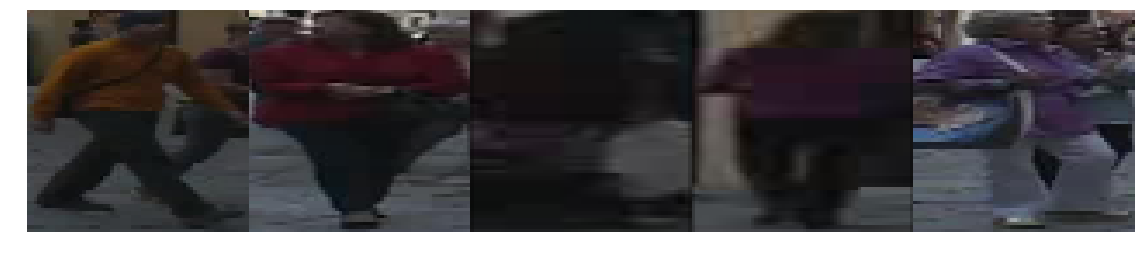

In [2]:
y_gt = utils.extract_eq(Y_gt, col=0, value=1)
y_gt = utils.extract_eq(y_gt, col=7, value=1)
y_gt = utils.extract_eq(y_gt, col=8, value=1)
print(y_gt.shape)

lookup = {}

pids = y_gt[:,1]
left = y_gt[:,2]
top = y_gt[:,3]
width = y_gt[:,4]
height = y_gt[:,5]

Ims = []

for pid, x, y, w, h in zip(*[pids, left, top, width, height]):
    if pid not in lookup:
        lookup[str(int(pid))] = []
    
    x = get_element(X[0], (x,y,w,h), (64,64))
    lookup[str(int(pid))].append(x)
    Ims.append(x)
        
        
print(lookup.keys())
utils.plot(Ims, cols=5)

predict the same:  [[0.9999840259552002 1.5984262063284405e-05]]


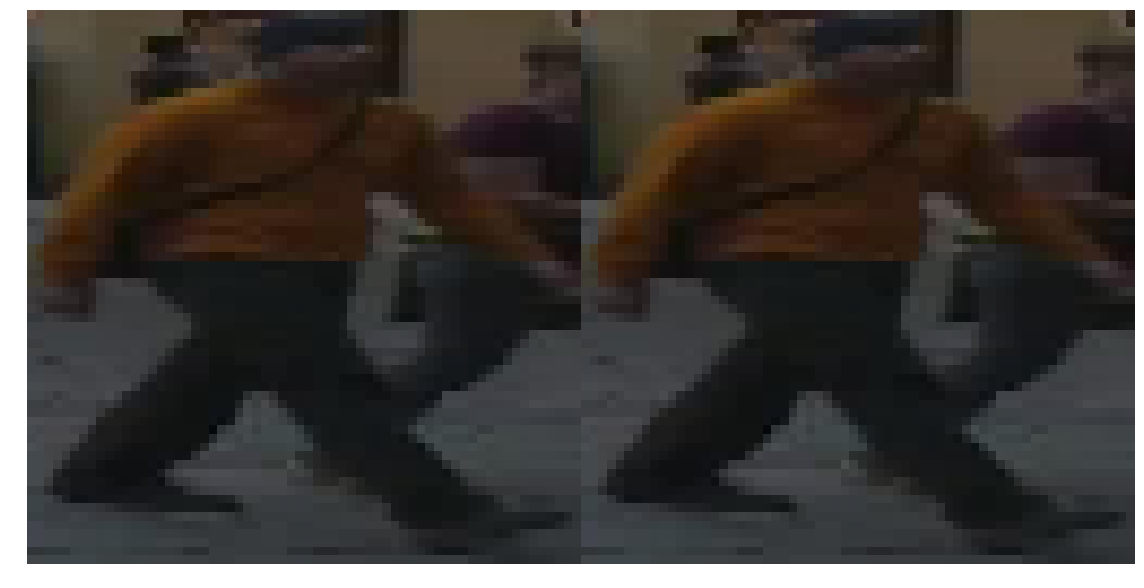

In [5]:
a,b = lookup['2'][0], lookup['2'][0]

print('predict the same: ', stacknet.predict(a, b).astype('object'))

utils.plot([a,b], cols=2)